## Introduction to Vector Embeddings

We have learnt what a vector is in the lesson [Data Structures - Scalars, Vectors, Matrices](./notes/data-structs.ipynb) and seen them used to train a basic neural network in [Neural Networks Part 2 - Training (MicroGrad)](./notes/nn-training.ipynb).

In this lesson, we will learn about a special type of vector called an **embedding** and how it is used to represent words in a text.

### Why Do We Need Numerical Representations of Data?

In machine learning and data analysis, algorithms typically work with numerical data. To make predictions or find patterns, we need to represent our data in a way that algorithms can process mathematically.

Remember our basic linear regression model?

$$
y = mx + c
$$

Here, we need to find the values of $m$ and $c$ that best fit the data. We do this by minimizing the error between the predicted values and the actual values.  Remember also that $x$ can be a scalar or a vector, i.e. have multiple values or features.

E.g. if we have a dataset of house prices, we might have a vector of features such as the number of bedrooms, the number of bathrooms, the size of the house, the location, etc.

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Sample data for four different houses
# [Size (square feet), Number of bedrooms, Number of bathrooms]
X = np.array([
    [1500, 2, 1],   # house 1
    [2500, 3, 2],   # house 2   
    [3000, 4, 2],   # house 3
    [3500, 5, 3]    # house 4
])

# House prices (hundereds of thousands of dollars) for the same four houses above
y = np.array([200000, 300000, 350000, 400000])

model = LinearRegression()
model.fit(X, y)

# Predict the price of a house with 3 bedrooms, 2 bathrooms, and 1500 square feet
new_house = np.array([[1750, 3, 1]])

In [6]:
predicted_price = model.predict(new_house)
print(f"The predicted price of the house is ${predicted_price[0]:,.2f}")

The predicted price of the house is $225,000.00


### Explanation:
We have a dataset of four houses with their features and prices. We want to predict the price of a new house with 3 bedrooms, 2 bathrooms, and 1500 square feet. We use the *LinearRegression* model (this is using a python library called *sklearn*) to find the best fit line between the features and the price. We then use the *predict* method to predict the price of the new house.

### Challenges with text data

Sometimes our data is not numerical like the house prices example above.  If our data is text, then we need to convert this text into a numerical representation.  This is where **embeddings** come in.

### What is an embedding?

An embedding is simply a clever way of turning words into numbers. A Vector embedding is just the same data reprsented as a vector.

The term embed means to place something firmly into a space.  So we are placing our text into a vector space - i.e. the space of numbers that can mathematically represent our text. 

Typically if our input is a set of text (e.g. a chapter from a book), then the first step is to break this text into individual words.  We call this process **tokenization**. 

Then, each word (or token) is converted into a numberical vector. This numerical vector is called the **vector embedding** of the word. 

Lets use a simple example.  If we have three words - cat, dog and mouse.  We can represent each of these as a three dimensional vector. 

For cat we make the first value in the vector 1.  

So $cat = [1, 0, 0]$.

For dog we make the second value in the vector 1. 

So $dog = [0, 1, 0]$.

For mouse we make the third value in the vector 1. 

So $mouse = [0, 0, 1]$.

This approach of using a different value with 1 is called a **one-hot encoding**. This is because only one of the values in a vector is 1 for any particular word and the rest are 0. 

Of course you can see the limitation here, in that there is only three words we can represent with this approach. The minute we add another word, we have to increase the size of our vectors by 1.

In addition two the limitation above, there are three other important things we would like our vector embeddings to do:

1. **Meaning:** Each vector should be able to capture the meaning of the word
2. **Relationship:** We would like the vectors to represent the relationship between the words. For e.g. if we have cat and cheetah, could the vector for each of these words have some things in common, i.e. the vectors should be similar in some way?
3. **Context:** We would like to be able to capture the context in which a word occurs. For e.g. in the sentence "The cat in the hat", the word "cat" has a different meaning than in the sentence "The dog in the hat".

Lets next look at a slightly more sophisticated approach that could address some of these issues.

In [7]:
# Sample corpus
corpus = [
    "The cat sat on the mat",
    "A dog barked at the mailman",
    "The cheetah is the fastest land animal",
    "Cats and dogs are common pets",
    "Cheetahs are big cats",
    "The dog chased the cat",
    "A cheetah can run very fast",
    "Dogs and cats can live together",
    "The cat in the hat",
    "The cheetah hunts in the grasslands"
]

In [9]:
import numpy as np

# Tokenize and preprocess
tokenized_corpus = []
for sentence in corpus:
    tokens = sentence.lower().split()
    tokenized_corpus.append(tokens)

# Build vocabulary
vocab = sorted(set(word for sentence in tokenized_corpus for word in sentence))
word_to_id = {word: idx for idx, word in enumerate(vocab)}
id_to_word = {idx: word for word, idx in word_to_id.items()}

print("Vocabulary:", vocab)
print("Word to ID:", word_to_id)
print("ID to Word:", id_to_word)


Vocabulary: ['a', 'and', 'animal', 'are', 'at', 'barked', 'big', 'can', 'cat', 'cats', 'chased', 'cheetah', 'cheetahs', 'common', 'dog', 'dogs', 'fast', 'fastest', 'grasslands', 'hat', 'hunts', 'in', 'is', 'land', 'live', 'mailman', 'mat', 'on', 'pets', 'run', 'sat', 'the', 'together', 'very']
Word to ID: {'a': 0, 'and': 1, 'animal': 2, 'are': 3, 'at': 4, 'barked': 5, 'big': 6, 'can': 7, 'cat': 8, 'cats': 9, 'chased': 10, 'cheetah': 11, 'cheetahs': 12, 'common': 13, 'dog': 14, 'dogs': 15, 'fast': 16, 'fastest': 17, 'grasslands': 18, 'hat': 19, 'hunts': 20, 'in': 21, 'is': 22, 'land': 23, 'live': 24, 'mailman': 25, 'mat': 26, 'on': 27, 'pets': 28, 'run': 29, 'sat': 30, 'the': 31, 'together': 32, 'very': 33}
ID to Word: {0: 'a', 1: 'and', 2: 'animal', 3: 'are', 4: 'at', 5: 'barked', 6: 'big', 7: 'can', 8: 'cat', 9: 'cats', 10: 'chased', 11: 'cheetah', 12: 'cheetahs', 13: 'common', 14: 'dog', 15: 'dogs', 16: 'fast', 17: 'fastest', 18: 'grasslands', 19: 'hat', 20: 'hunts', 21: 'in', 22: 'i

In [10]:
# Embedding size (number of dimensions)
embedding_size = 5  # Keep it small for simplicity

# Initialize embeddings randomly
embedding_matrix = np.random.uniform(-1, 1, (len(vocab), embedding_size))

print("Initial Embedding for 'cat':", embedding_matrix[word_to_id['cat']])

Initial Embedding for 'cat': [-0.1045977  -0.85812358  0.92050737  0.67149673  0.34570203]


In [11]:
# Context window size (number of words to the left and right)
window_size = 2

In [12]:
# Generate training data
training_data = []

for sentence in tokenized_corpus:
    sentence_length = len(sentence)
    for index, target_word in enumerate(sentence):
        target_word_id = word_to_id[target_word]
        # Define context window boundaries
        start = max(0, index - window_size)
        end = min(sentence_length, index + window_size + 1)
        # Collect context words
        context_words = [sentence[i] for i in range(start, end) if i != index]
        for context_word in context_words:
            context_word_id = word_to_id[context_word]
            training_data.append((target_word_id, context_word_id))

print("Sample Training Data (word IDs):", training_data[:5])

Sample Training Data (word IDs): [(31, 8), (31, 30), (8, 31), (8, 30), (8, 27)]


In [13]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [14]:
# Hyperparameters
learning_rate = 0.01
epochs = 1000

# Training loop
for epoch in range(epochs):
    total_loss = 0
    for target_id, context_id in training_data:
        # Get embeddings
        target_vector = embedding_matrix[target_id]
        context_vector = embedding_matrix[context_id]

        # Calculate similarity (dot product)
        similarity = np.dot(target_vector, context_vector)

        # Calculate loss (we want the similarity to be high)
        loss = -np.log(sigmoid(similarity))
        total_loss += loss

        # Calculate gradients
        grad = (sigmoid(similarity) - 1)  # Derivative of loss w.r.t similarity

        # Update embeddings
        embedding_matrix[target_id] -= learning_rate * grad * context_vector
        embedding_matrix[context_id] -= learning_rate * grad * target_vector

    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}")

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Epoch 100/1000, Loss: 4.9613
Epoch 200/1000, Loss: 1.5525
Epoch 300/1000, Loss: 0.8478
Epoch 400/1000, Loss: 0.5651
Epoch 500/1000, Loss: 0.4169
Epoch 600/1000, Loss: 0.3271
Epoch 700/1000, Loss: 0.2674
Epoch 800/1000, Loss: 0.2250
Epoch 900/1000, Loss: 0.1936
Epoch 1000/1000, Loss: 0.1694


In [15]:
def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

# List of words to compare
words = ['cat', 'dog', 'cheetah', 'hat', 'grasslands']

# Compute similarities
for word1 in words:
    for word2 in words:
        if word1 != word2:
            sim = cosine_similarity(embedding_matrix[word_to_id[word1]], embedding_matrix[word_to_id[word2]])
            print(f"Similarity between '{word1}' and '{word2}': {sim:.4f}")
    print()

Similarity between 'cat' and 'dog': 0.6329
Similarity between 'cat' and 'cheetah': 0.5685
Similarity between 'cat' and 'hat': 0.6092
Similarity between 'cat' and 'grasslands': 0.4044

Similarity between 'dog' and 'cat': 0.6329
Similarity between 'dog' and 'cheetah': 0.8728
Similarity between 'dog' and 'hat': 0.3381
Similarity between 'dog' and 'grasslands': 0.3671

Similarity between 'cheetah' and 'cat': 0.5685
Similarity between 'cheetah' and 'dog': 0.8728
Similarity between 'cheetah' and 'hat': 0.5451
Similarity between 'cheetah' and 'grasslands': 0.6315

Similarity between 'hat' and 'cat': 0.6092
Similarity between 'hat' and 'dog': 0.3381
Similarity between 'hat' and 'cheetah': 0.5451
Similarity between 'hat' and 'grasslands': 0.9419

Similarity between 'grasslands' and 'cat': 0.4044
Similarity between 'grasslands' and 'dog': 0.3671
Similarity between 'grasslands' and 'cheetah': 0.6315
Similarity between 'grasslands' and 'hat': 0.9419



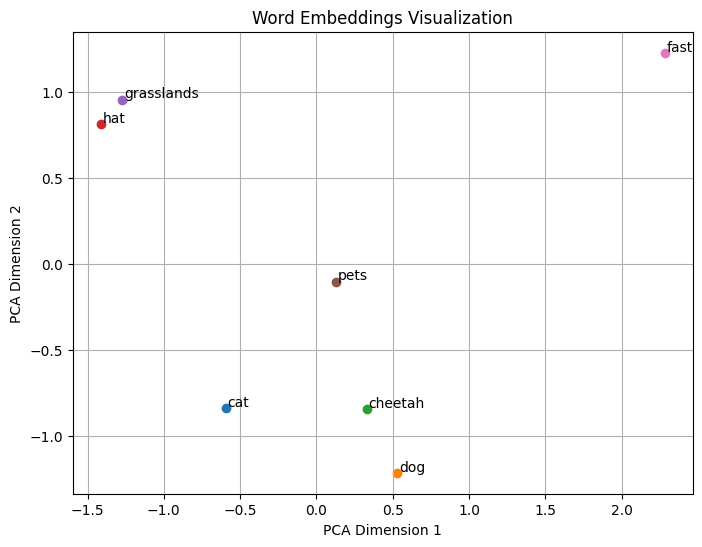

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Words to visualize
words_to_visualize = ['cat', 'dog', 'cheetah', 'hat', 'grasslands', 'pets', 'fast']

# Get embeddings
embeddings_subset = np.array([embedding_matrix[word_to_id[word]] for word in words_to_visualize])

# Reduce dimensions
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings_subset)

# Plot
plt.figure(figsize=(8, 6))
for i, word in enumerate(words_to_visualize):
    x, y = reduced_embeddings[i]
    plt.scatter(x, y)
    plt.annotate(word, (x + 0.01, y + 0.01))
plt.title("Word Embeddings Visualization")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.grid(True)
plt.show()